# MODELADO PREDICTIVO AVANZADO CON DATOS ABIERTOS DE COLOMBIA
# PRIMERA PARTE: REGRESIÓN POLINÓMICA, RIDGE Y LASSO
# SEGUNDA PARTE: ÁRBOL DE DECISION Y RANDOM FOREST

## **Descripción de la Actividad**
En esta actividad, los estudiantes trabajarán con datos abiertos de Colombia disponibles en formato JSON, realizarán una limpieza y transformación de los datos en **R** y **Python**, y aplicarán técnicas avanzadas de modelado predictivo. Los estudiantes deberán implementar modelos de **Regresión Polinómica**, **Ridge**, y **Lasso**, utilizando las librerías adecuadas de ambos lenguajes, y realizar una evaluación de los modelos empleando métricas avanzadas como validación cruzada y ajuste de hiperparámetros.

### **Dataset Recomendado**
Datos Abiertos Colombia proporciona una amplia variedad de datasets en formato JSON. Uno interesante para esta actividad podría ser:

- **Dataset:** Accidentalidad en Colombia (disponible en formato JSON).  
  **Accidentalidad Vial 2017 - 2021 | Datos Abiertos Colombia**.  
- **Descripción:** Este dataset contiene información sobre accidentes de tránsito en Colombia, con atributos que incluyen fecha, hora, localización geográfica, tipo de accidente, cantidad de heridos, vehículos involucrados, etc.

### **Objetivo General**
Desarrollar un pipeline de análisis y modelado predictivo que permita predecir el número de accidentes de tránsito utilizando técnicas de **Regresión Polinómica**, **Ridge**, y **Lasso**.

### **Objetivos Específicos**
1. Cargar y transformar datos desde un archivo JSON a CSV.  
2. Limpiar los datos y preparar el dataset para su análisis.  
3. Implementar modelos de **Regresión Polinómica**, **Ridge**, y **Lasso** utilizando **R** y/o **Python**.  
4. Evaluar y optimizar los modelos mediante validación cruzada y ajuste de hiperparámetros.  
5. Comparar los resultados obtenidos con cada técnica y reflexionar sobre la mejor opción para predecir accidentes.

---

## **INSTRUCCIONES**

### **1. Carga y Transformación de Datos**
- Utiliza los lenguajes de **R** y **Python** para cargar el archivo en formato JSON desde el enlace proporcionado.  
- Transforma el archivo JSON a CSV para facilitar el análisis posterior.  
- Verifica que los datos cargados sean consistentes (por ejemplo, que no haya filas vacías o con valores incorrectos).  

### **2. Limpieza y Preparación de los Datos**
- Identifica las variables útiles para el análisis. Por ejemplo, selecciona variables relacionadas con la localización geográfica, tipo de accidente, número de heridos, y vehículos involucrados.  
- Detecta y elimina valores nulos o atípicos, y convierte las variables categóricas en numéricas o dummies según sea necesario.  
- Asegúrate de que los datos estén escalados (normalizados) antes de proceder con el modelado.  

### **3. Modelado Predictivo**
- **Regresión Polinómica:** Implementa este modelo en **R** y **Python**, ajustando el grado del polinomio para encontrar el mejor ajuste.  
- **Ridge y Lasso:** Desarrolla modelos utilizando regularización Ridge y Lasso para mejorar el rendimiento y prevenir el sobreajuste.  
- Implementa las librerías correspondientes:  
  - **En Python:** usa `scikit-learn` para la creación de los modelos.  
  - **En R:** usa `glmnet` o `caret` para Ridge y Lasso.  

### **4. Evaluación de los Modelos**
- Implementa la validación cruzada (**k-fold cross-validation**) para cada modelo y evalúa su rendimiento con métricas como el **RMSE (Root Mean Square Error)** y el **R²**.  
- Ajusta los hiperparámetros utilizando técnicas como la búsqueda en cuadrícula (**grid search**) o **random search**.  

### **5. Análisis Comparativo y Optimización**
- Compara los resultados obtenidos entre los tres modelos (**Polinómico**, **Ridge**, y **Lasso**).  
- Reflexiona sobre el impacto que tiene la regularización en el modelo y discute cuál sería el más adecuado para este tipo de datos.  

---

## **Entregables**
- **Código:** El código utilizado en **R** y **Python** para el análisis, la limpieza de datos y el modelado.  
- **Informe:** Un informe (máximo 4 páginas) que resuma el proceso de análisis, las conclusiones obtenidas de la comparación de modelos y recomendaciones para mejorar la precisión del modelo predictivo.  
- **Formato de Entrega:**  
  - El informe debe entregarse en formato **.PDF**.  
  - Nombre del archivo: `ACTIVIDAD_1_Apellido_Nombre_Grupo_Numero`.  


In [92]:
# instalar las librerias necesarias
!pip install scikit-learn numpy pandas matplotlib seaborn tabulate

In [93]:
# Importar las librerias de trabajo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from tabulate import tabulate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from pandas import read_csv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Paso 1: Carga del Dataset
El primer paso es cargar el conjunto de datos y seleccionar las variables relevantes para el análisis. Además, se debe calcular el número total de accidentes de tránsito como una nueva columna basada en las variables del dataset.

In [94]:
import pandas as pd

# URL del dataset
url = "https://www.datos.gov.co/resource/jj5k-4x95.csv"

# Cargar los datos
df = pd.read_csv(url)

df.head()




,objectid,codigo,territorial,amv,fecha_registro,codigo_via,pr,distancia_pr,fecha_acc,dia_semana_acc,...,meas,eventid,ruta_id,locerror,lado,hora_acc,n_heridos_1,fuente,observa,causa_old
0,36801,75030,San Andres y Providencia,SAP1,2018-03-06 16:52,0101,22,900,2018-02-25 5:00,domingo,...,23072.603840,acc_hermes75030,0101_0,NO ERROR,1,NaN,NaN,NaN,NaN,Impericia en el manejo
1,36802,75028,San Andres y Providencia,SAP1,2018-03-06 16:51,0101,21,940,2018-02-17 5:00,sabado,...,22117.764250,acc_hermes75028,0101_0,NO ERROR,1,NaN,NaN,NaN,NaN,Embriaguez del conductor
2,36803,75013,San Andres y Providencia,SAP1,2018-03-06 16:46,0101,1,500,2018-02-03 5:00,sabado,...,1508.084407,acc_hermes75013,0101_0,NO ERROR,1,NaN,NaN,NaN,NaN,Impericia en el manejo
3,36804,75010,San Andres y Providencia,SAP1,2018-03-06 16:44,0101,26,800,2018-01-27 5:00,sabado,...,27017.862710,acc_hermes75010,0101_0,NO ERROR,1,NaN,NaN,NaN,NaN,Impericia en el manejo
4,36805,75008,San Andres y Providencia,SAP1,2018-03-06 16:42,0101,16,300,2018-01-24 5:00,miercoles,...,16436.268570,acc_hermes75008,0101_0,NO ERROR,2,NaN,NaN,NaN,NaN,Impericia en el manejo


In [95]:
# Selección de las variables relevantes
columns_of_interest = ['fecha_acc', 'territorial', 'clase_accidente', 'n_heridos', 'n_muertos']
df = df[columns_of_interest]

# Calcular el número de accidentes como suma de heridos y muertos (puede adaptarse según los datos)
df['n_accidentes'] = df['n_heridos'] + df['n_muertos']

# Inspeccionar los primeros datos
print("\nDatos seleccionados:")
print(df.head())


Datos seleccionados:
         fecha_acc               territorial clase_accidente  n_heridos  \
0  2018-02-25 5:00  San Andres y Providencia          Choque          2   
1  2018-02-17 5:00  San Andres y Providencia          Choque          3   
2  2018-02-03 5:00  San Andres y Providencia          Choque          2   
3  2018-01-27 5:00  San Andres y Providencia          Choque          3   
4  2018-01-24 5:00  San Andres y Providencia          Choque          2   

   n_muertos  n_accidentes  
0          0             2  
1          0             3  
2          0             2  
3          0             3  
4          0             2  


<ipython-input-95-07bd300ec0fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_accidentes'] = df['n_heridos'] + df['n_muertos']


# Paso 2: Preprocesamiento de los Datos

Manejo de valores nulos.

Conversión de variables categóricas a numéricas.

Eliminación de outliers.

Escalado de los datos.

In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Manejar valores nulos
df = df.dropna()

# 2. Convertir variables categóricas en numéricas
label_encoders = {}
for col in ['territorial', 'clase_accidente']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Detectar y eliminar outliers usando el IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['n_heridos', 'n_muertos', 'n_accidentes']:
    df = remove_outliers(df, col)

# 4. Escalar las variables numéricas
scaler = StandardScaler()
numeric_columns = ['n_heridos', 'n_muertos', 'n_accidentes']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDatos después del preprocesamiento:")
print(df.head())



Datos después del preprocesamiento:
         fecha_acc  territorial  clase_accidente  n_heridos  n_muertos  \
0  2018-02-25 5:00           17                4   1.882206        0.0   
2  2018-02-03 5:00           17                4   1.882206        0.0   
4  2018-01-24 5:00           17                4   1.882206        0.0   
5  2018-01-21 5:00           17                4   0.540882        0.0   
9  2017-12-04 5:00           17                4   0.540882        0.0   

   n_accidentes  
0      1.882206  
2      1.882206  
4      1.882206  
5      0.540882  
9      0.540882  


# Paso 3: División de los Datos
Se divide el conjunto de datos en entrenamiento y prueba.

In [97]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df[['territorial', 'clase_accidente', 'n_heridos', 'n_muertos']]
y = df['n_accidentes']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso 4: Implementación de Modelos
A. Regresión Polinómica

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transformar las características en polinomiales
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustar el modelo
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicciones
y_pred_poly = poly_model.predict(X_test_poly)


B. Regresión Ridge

In [99]:
from sklearn.linear_model import Ridge

# Ajustar modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_model.predict(X_test)


C. Regresión Lasso

In [100]:
from sklearn.linear_model import Lasso

# Ajustar modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred_lasso = lasso_model.predict(X_test)


### **Regresión Polinómica, Lasso y Ridge: Explicación y Propósito**

---

### **1. Regresión Polinómica**

#### **¿Qué es?**
La regresión polinómica extiende la regresión lineal al permitir que la relación entre la variable independiente (predictora) y la variable dependiente (objetivo) sea **no lineal**. Esto se logra añadiendo términos polinómicos (e.g., \(x^2, x^3\)) como características adicionales al modelo.

#### **¿Cómo funciona?**
- **Transformación de características:** Se generan términos adicionales de mayor grado (e.g., \(x, x^2, x^3\)).
- **Modelo lineal ajustado:** Aunque las características son no lineales, el modelo sigue siendo lineal respecto a los coeficientes.

#### **Ventajas:**
- Captura relaciones **no lineales** entre las variables.
- Más flexible que la regresión lineal simple.

#### **Desventajas:**
- Propensa al **sobreajuste** con grados polinómicos altos.
- Puede ser ineficiente si los datos son ruidosos.

#### **Información que provee:**
- Coeficientes asociados a cada término del polinomio.
- Explica cómo cada grado del término (e.g., \(x, x^2\)) contribuye a la predicción.
- Indicadores como \(R^2\) y el error cuadrático medio (RMSE) para medir el ajuste del modelo.

---

### **2. Regresión Lasso**

#### **¿Qué es?**
Lasso (Least Absolute Shrinkage and Selection Operator) es una técnica de regresión lineal que utiliza **regularización L1** para reducir el sobreajuste y seleccionar automáticamente las características más importantes.

#### **¿Cómo funciona?**
- **Penalización L1:** Añade una penalización proporcional a la suma de los valores absolutos de los coeficientes (\(\sum |w_j|\)) al cálculo de la función de costo.
- Esto puede llevar a que algunos coeficientes se reduzcan exactamente a **cero**, eliminando características irrelevantes.

#### **Ventajas:**
- Realiza selección automática de características.
- Previene el sobreajuste en modelos con muchas variables.

#### **Desventajas:**
- Puede eliminar variables relevantes si son altamente correlacionadas con otras.

#### **Información que provee:**
- Selecciona las variables más importantes, eliminando las irrelevantes.
- Ofrece coeficientes ajustados que reflejan la influencia de cada variable en el modelo.
- Permite interpretar qué variables son relevantes para la predicción.

---

### **3. Regresión Ridge**

#### **¿Qué es?**
Ridge es una técnica de regresión lineal que utiliza **regularización L2** para reducir el sobreajuste, especialmente en datasets con muchas características correlacionadas.

#### **¿Cómo funciona?**
- **Penalización L2:** Añade una penalización proporcional al cuadrado de los coeficientes (\(\sum w_j^2\)) al cálculo de la función de costo.
- En lugar de eliminar variables, reduce la magnitud de los coeficientes para controlar el impacto de las características menos importantes.

#### **Ventajas:**
- Controla el sobreajuste sin eliminar características.
- Funciona bien con datos multicolineales (alta correlación entre variables).

#### **Desventajas:**
- No realiza selección de características (no elimina variables irrelevantes).

#### **Información que provee:**
- Reduce el impacto de las características menos importantes al "encoger" los coeficientes.
- Ayuda a interpretar qué características tienen mayor o menor relevancia.
- Indicadores como \(R^2\) y RMSE ayudan a evaluar el ajuste del modelo.

---

### **Comparación entre las Tres Técnicas**

| Aspecto               | **Regresión Polinómica**    | **Lasso**                     | **Ridge**                     |
|-----------------------|-----------------------------|-------------------------------|-------------------------------|
| **Tipo de Relación**  | No lineal                  | Lineal (con regularización)   | Lineal (con regularización)   |
| **Regularización**    | No aplica                  | L1 (suma de valores absolutos)| L2 (suma de cuadrados)        |
| **Objetivo**          | Capturar no linealidades   | Selección de características  | Controlar el sobreajuste      |
| **Efecto en Variables**| Añade términos polinómicos | Elimina variables irrelevantes| Reduce magnitud de coeficientes |
| **Principal Uso**     | Modelar relaciones complejas | Modelos con muchas variables  | Modelos con colinealidad alta |

---

### **Reflexión Final**
1. **Regresión Polinómica:**
   - Útil cuando hay relaciones complejas entre las variables.
   - Puede ser propensa al sobreajuste en datasets ruidosos o con pocas muestras.

2. **Lasso:**
   - Excelente para la selección de características en datasets grandes.
   - Reduce el modelo a las variables más relevantes.

3. **Ridge:**
   - Ideal para manejar colinealidad y evitar el sobreajuste sin eliminar variables.

En el contexto del análisis de accidentes de tránsito, estas técnicas pueden ofrecer distintas perspectivas:
- **Polinómica:** Explora relaciones no lineales (e.g., entre heridos y accidentes).
- **Lasso:** Identifica las variables más relevantes (e.g., clase de accidente o territorial).
- **Ridge:** Controla el impacto de variables correlacionadas para

lograr un modelo más estable y generalizable, especialmente si hay múltiples características relacionadas (e.g., heridos y muertos).

### **Conclusión**
Cada técnica tiene su propio enfoque y ventajas, por lo que la elección dependerá de los datos y del objetivo específico del análisis. Comparar estas técnicas en términos de sus métricas de evaluación (como RMSE y \(R^2\)) proporciona una visión más clara de cuál es más adecuada en un contexto específico.

# Paso 5: Validación Cruzada y Evaluación
Se utiliza validación cruzada y se calculan métricas como RMSE y
𝑅
2
R
2
 .

In [101]:
# Función para calcular métricas
def evaluate_model(model, X, y, model_name):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5).mean())
    r2 = cross_val_score(model, X, y, scoring='r2', cv=5).mean()
    print(f"{model_name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}")

# Evaluación
print("\nEvaluación de modelos:")
evaluate_model(poly_model, X_train_poly, y_train, "Regresión Polinómica")
evaluate_model(ridge_model, X_train, y_train, "Ridge")
evaluate_model(lasso_model, X_train, y_train, "Lasso")



Evaluación de modelos:
Regresión Polinómica - RMSE: 0.0000, R^2: 1.0000
Ridge - RMSE: 0.0018, R^2: 1.0000
Lasso - RMSE: 0.1009, R^2: 0.9897


### **Interpretación de los Resultados**

Los resultados muestran las métricas de evaluación para los modelos de **Regresión Polinómica**, **Ridge**, y **Lasso**, que fueron ajustados al conjunto de datos. Estas métricas son:

1. **RMSE (Root Mean Square Error):**
   - Representa el error promedio de las predicciones del modelo en las mismas unidades de la variable objetivo.
   - Un RMSE más bajo indica un mejor ajuste del modelo a los datos.

2. **R² (Coeficiente de Determinación):**
   - Indica la proporción de la variación en la variable objetivo que es explicada por las variables predictoras.
   - R² = 1 indica un ajuste perfecto; R² cercano a 1 sugiere un modelo altamente explicativo.

---

### **Resultados y Análisis**

| **Modelo**               | **RMSE**   | **R²**   | **Interpretación**                                                                                              |
|--------------------------|------------|----------|------------------------------------------------------------------------------------------------------------------|
| **Regresión Polinómica** | 0.0000     | 1.0000   | Ajuste perfecto a los datos. El modelo captura completamente la relación entre las variables.                    |
| **Ridge**                | 0.0018     | 1.0000   | Ajuste casi perfecto, con un pequeño error debido a la penalización L2 que regulariza los coeficientes del modelo.|
| **Lasso**                | 0.1009     | 0.9897   | Ajuste muy bueno, pero menor en comparación con los otros modelos. Esto puede deberse a que Lasso elimina coeficientes pequeños.|

---

### **Interpretación Detallada**

#### **1. Regresión Polinómica**
- **RMSE: 0.0000, R²: 1.0000**
  - Este resultado indica que el modelo polinómico ajusta perfectamente los datos. Sin embargo, un ajuste perfecto puede ser un **indicador de sobreajuste** (overfitting), especialmente si los datos contienen ruido o si el modelo tiene un grado polinómico demasiado alto.
  - **Cuidado:** Un modelo sobreajustado puede tener un rendimiento pobre en datos nuevos.

#### **2. Regresión Ridge**
- **RMSE: 0.0018, R²: 1.0000**
  - Este modelo tiene un ajuste casi perfecto, pero con un error mínimo debido a la regularización L2 que reduce la magnitud de los coeficientes. La penalización introduce un pequeño compromiso en el ajuste a favor de mejorar la generalización del modelo.
  - **Ventaja:** Ridge controla el sobreajuste al prevenir coeficientes muy grandes.

#### **3. Regresión Lasso**
- **RMSE: 0.1009, R²: 0.9897**
  - Este modelo tiene un error ligeramente mayor y un \(R^2\) menor en comparación con los otros modelos. Esto ocurre porque la regularización L1 de Lasso elimina algunas variables al reducir sus coeficientes a cero, simplificando el modelo.
  - **Ventaja:** Aunque tiene un ajuste ligeramente inferior, Lasso es ideal para seleccionar características relevantes y reducir la complejidad del modelo.

---

### **Conclusión Comparativa**

| **Aspecto**              | **Regresión Polinómica**       | **Ridge**                          | **Lasso**                         |
|--------------------------|--------------------------------|------------------------------------|-----------------------------------|
| **Ajuste a los datos**   | Ajuste perfecto (sobreajuste). | Excelente ajuste y generalización. | Buen ajuste, más simple.          |
| **Complejidad del modelo**| Alta (términos polinómicos).  | Moderada (coeficientes reducidos). | Baja (al eliminar coeficientes).   |
| **Uso práctico**         | Riesgo de sobreajuste.         | Modelo robusto para datos correlacionados. | Ideal para simplificar y seleccionar características. |

---

### **Recomendación**
- **Regresión Polinómica:** Úsala con cuidado; ajusta el grado del polinomio para evitar sobreajuste. Puede ser útil si la relación entre las variables es no lineal y tienes un conjunto de datos limpio.
- **Ridge:** Es la mejor opción en este caso, ya que proporciona un ajuste casi perfecto mientras controla el sobreajuste y mejora la generalización.
- **Lasso:** Ideal si deseas un modelo más simple y con menor número de variables, sacrificando un poco el ajuste perfecto.

Si el objetivo es generalizar el modelo y prevenir el sobreajuste, **Ridge es probablemente la mejor opción** en este análisis.

### **Explicación del Código**

Este código implementa una función llamada `evaluate_model` para evaluar el rendimiento de diferentes modelos de regresión utilizando **validación cruzada** y dos métricas: **RMSE (Root Mean Squared Error)** y \(R^2\) (coeficiente de determinación). Posteriormente, se utiliza esta función para evaluar tres modelos: **Regresión Polinómica**, **Ridge**, y **Lasso**.

---

### **Componentes del Código**

1. **Librerías Importadas:**
   - `cross_val_score`: Realiza validación cruzada para calcular métricas en diferentes particiones del conjunto de datos.
   - `mean_squared_error` y `r2_score`: Métricas para evaluar el rendimiento de los modelos (no utilizadas directamente aquí, pero relacionadas con los cálculos realizados).

2. **Función `evaluate_model`:**
   ```python
   def evaluate_model(model, X, y, model_name):
       rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5).mean())
       r2 = cross_val_score(model, X, y, scoring='r2', cv=5).mean()
       print(f"{model_name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}")
   ```
   - **Parámetros:**
     - `model`: Modelo a evaluar (e.g., `LinearRegression`, `Ridge`, etc.).
     - `X`: Matriz de características.
     - `y`: Variable objetivo.
     - `model_name`: Nombre del modelo, usado para imprimir los resultados.
   - **Cálculos:**
     - `cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)`:
       - Calcula el **error cuadrático medio negativo (neg_mean_squared_error)** para cada partición del conjunto de datos (con `cv=5`, realiza validación cruzada con 5 pliegues).
       - La puntuación se devuelve como negativa, por lo que se multiplica por `-1` antes de calcular la raíz cuadrada.
       - Se utiliza la media de los resultados para obtener el **RMSE** (error promedio en las mismas unidades de la variable objetivo).
     - `cross_val_score(model, X, y, scoring='r2', cv=5)`:
       - Calcula el **coeficiente de determinación (\(R^2\))** en cada partición.
       - La media de los resultados proporciona el \(R^2\) promedio.
   - **Salida:**
     - Imprime el nombre del modelo, su RMSE, y su \(R^2\).

3. **Evaluación de los Modelos:**
   ```python
   print("\nEvaluación de modelos:")
   evaluate_model(poly_model, X_train_poly, y_train, "Regresión Polinómica")
   evaluate_model(ridge_model, X_train, y_train, "Ridge")
   evaluate_model(lasso_model, X_train, y_train, "Lasso")
   ```
   - **Regresión Polinómica:**
     - Usa `poly_model` con las características polinómicas `X_train_poly`.
   - **Ridge:**
     - Usa `ridge_model` con las características originales `X_train`.
   - **Lasso:**
     - Usa `lasso_model` con las características originales `X_train`.
   - La función `evaluate_model` calcula y muestra el RMSE y \(R^2\) promedio para cada modelo.

---

### **Propósito del Código**
1. **Validación Cruzada:**
   - Divide el conjunto de datos en 5 particiones (por `cv=5`) para evaluar el modelo en diferentes subconjuntos y obtener métricas más robustas.
   - Ayuda a prevenir el sobreajuste y proporciona una evaluación más generalizada del rendimiento del modelo.

2. **Métricas de Evaluación:**
   - **RMSE:** Indica el error promedio en las mismas unidades que la variable objetivo. Un RMSE más bajo significa un mejor ajuste.
   - **\(R^2\):** Mide qué porcentaje de la variabilidad en la variable objetivo es explicado por las características. Un valor más cercano a 1 indica un mejor ajuste.

3. **Comparación de Modelos:**
   - Evalúa los tres modelos (Regresión Polinómica, Ridge y Lasso) de manera uniforme, permitiendo comparar su rendimiento basado en las métricas calculadas.

---

### **Conclusión**
Este código implementa un pipeline eficiente para evaluar modelos de regresión utilizando validación cruzada. Las métricas calculadas (RMSE y \(R^2\)) permiten identificar el modelo que mejor equilibra precisión y generalización. Es una práctica estándar para garantizar que los resultados sean robustos y no dependan de una sola partición de datos.

# Paso 6: Búsqueda de Hiperparámetros
Se realiza una búsqueda en cuadrícula para ajustar hiperparámetros.

In [102]:
from sklearn.model_selection import GridSearchCV
'''
# GridSearch para Ridge
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print(f"Mejor hiperparámetro para Ridge: {ridge_grid.best_params_}")

# GridSearch para Lasso
lasso_params = {'alpha': [0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print(f"Mejor hiperparámetro para Lasso: {lasso_grid.best_params_}")
'''
# Regularización Ridge
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}  # Valores de alpha para probar
ridge = Ridge()

grid_ridge = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train, y_train)

# Mejor modelo y evaluación
ridge_best = grid_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)

print("Mejor hiperparámetro para Ridge:", grid_ridge.best_params_)
print(f"Ridge - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}, R^2: {r2_score(y_test, y_pred_ridge):.4f}")

# Regularización Lasso
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}  # Valores de alpha para probar
lasso = Lasso(max_iter=10000)

grid_lasso = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_train, y_train)

# Mejor modelo y evaluación
lasso_best = grid_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)

print("Mejor hiperparámetro para Lasso:", grid_lasso.best_params_)
print(f"Lasso - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}, R^2: {r2_score(y_test, y_pred_lasso):.4f}")


Mejor hiperparámetro para Ridge: {'alpha': 0.01}
Ridge - RMSE: 0.0000, R^2: 1.0000
Mejor hiperparámetro para Lasso: {'alpha': 0.01}
Lasso - RMSE: 0.0104, R^2: 0.9999


### **Interpretación de los Resultados**

Los resultados muestran los mejores valores del hiperparámetro **alpha** encontrados para los modelos **Ridge** y **Lasso** utilizando técnicas de búsqueda, como **GridSearchCV**.

---

### **Concepto de \( \alpha \) en Ridge y Lasso**
- **\( \alpha \)** controla la intensidad de la regularización aplicada a los coeficientes del modelo:
  - \( \alpha = 0 \): El modelo se comporta como una regresión lineal ordinaria, sin regularización.
  - A medida que \( \alpha \) aumenta, la regularización es más fuerte, lo que reduce la magnitud de los coeficientes:
    - En **Ridge**, los coeficientes se encogen hacia valores pequeños pero no se eliminan (penalización L2).
    - En **Lasso**, algunos coeficientes se reducen exactamente a cero (penalización L1), eliminando variables irrelevantes.

El valor óptimo de \( \alpha \) equilibra entre:
- **Sesgo y varianza:** Controla el sobreajuste y el ajuste insuficiente.
- **Complejidad del modelo:** Regula la influencia de las variables predictoras.

---

### **Resultados**

#### **1. Ridge: Mejor hiperparámetro (\( \alpha = 0.1 \))**
- **Interpretación:**
  - Un \( \alpha \) bajo significa que la regularización aplicada es ligera.
  - Esto sugiere que los coeficientes del modelo no necesitan un ajuste drástico, probablemente porque los datos no tienen colinealidad alta o ruido significativo.
- **Impacto:**
  - Se mantiene un buen ajuste del modelo sin sacrificar demasiada flexibilidad.
  - Controla el sobreajuste sin distorsionar excesivamente los coeficientes.

---

#### **2. Lasso: Mejor hiperparámetro (\( \alpha = 0.01 \))**
- **Interpretación:**
  - Un \( \alpha \) bajo también indica una regularización ligera.
  - Esto implica que el modelo requiere eliminar o reducir pocas variables irrelevantes.
  - Es posible que la mayoría de las variables predictoras sean relevantes para el modelo.
- **Impacto:**
  - Lasso puede simplificar el modelo eliminando características irrelevantes o redundantes.
  - Garantiza un modelo más interpretable y evita el sobreajuste.

---

### **Comparación entre Ridge y Lasso**

| **Aspecto**          | **Ridge (\( \alpha = 0.1 \))**                          | **Lasso (\( \alpha = 0.01 \))**                        |
|-----------------------|--------------------------------------------------------|-------------------------------------------------------|
| **Regularización**    | Penaliza la magnitud de los coeficientes (L2).          | Reduce coeficientes a cero para seleccionar variables (L1). |
| **Modelo obtenido**   | Mantiene todos los coeficientes, ajustados ligeramente.| Elimina algunas variables irrelevantes.               |
| **Intensidad (\( \alpha \))** | Baja, lo que permite flexibilidad en el ajuste.       | Muy baja, indicando poca necesidad de regularización. |

---

### **Reflexión sobre los Resultados**

1. **Significado de los valores bajos de \( \alpha \):**
   - Los datos tienen buena calidad, poca multicolinealidad y variables predictoras relevantes.
   - La regularización no necesita ser intensa para lograr un equilibrio entre ajuste y generalización.

2. **Elección entre Ridge y Lasso:**
   - **Ridge**: Si todas las variables tienen cierta relevancia, es preferible porque no elimina ninguna.
   - **Lasso**: Si el objetivo es seleccionar un subconjunto más pequeño de variables, este es más adecuado.

3. **Contexto de uso:**
   - Si el problema involucra muchos datos correlacionados (colinealidad alta), **Ridge** puede ser más robusto.
   - Si se busca un modelo más interpretable con menos variables, **Lasso** es ideal.

En este caso, ambos modelos parecen ser efectivos, con ligeras diferencias en su comportamiento y propósito.

### **Impacto de la Regularización en los Modelos y Comparación**

---

### **Impacto de la Regularización**

La **regularización** tiene un impacto clave en los modelos predictivos al controlar la complejidad del modelo y prevenir problemas como el **sobreajuste**. Tanto Ridge como Lasso utilizan regularización para manejar los coeficientes de las características de manera diferente:

1. **Regresión Polinómica (sin regularización):**
   - No utiliza regularización, lo que permite al modelo ajustarse perfectamente a los datos de entrenamiento.
   - **Impacto:**
     - Si los datos tienen ruido o patrones complejos, el modelo memoriza los datos en lugar de generalizar.
     - Esto conduce a **sobreajuste**, donde el modelo tiene un desempeño perfecto en el entrenamiento pero falla en datos nuevos.

2. **Ridge (Regularización L2):**
   - Reduce la magnitud de los coeficientes, penalizando los valores extremos.
   - **Impacto:**
     - Mantiene todas las características, pero controla su influencia en las predicciones.
     - Mejora la **generalización** al reducir la sensibilidad del modelo a pequeñas fluctuaciones en los datos.
     - Ideal para escenarios donde todas las características tienen cierta relevancia.

3. **Lasso (Regularización L1):**
   - Reduce algunos coeficientes a cero, eliminando características irrelevantes.
   - **Impacto:**
     - Simplifica el modelo al seleccionar únicamente las características más importantes.
     - Es útil para interpretar el modelo y priorizar las variables predictoras, pero puede sacrificar precisión en comparación con Ridge.

---

### **Comparación entre los Modelos**

| **Aspecto**             | **Regresión Polinómica**       | **Ridge**                          | **Lasso**                         |
|--------------------------|-------------------------------|------------------------------------|-----------------------------------|
| **Regularización**       | No aplica                    | L2: Reduce magnitudes.             | L1: Selección de características. |
| **Precisión del Ajuste** | Ajuste perfecto (sobreajuste). | Ajuste preciso y generalizable.    | Ajuste bueno, pero menos preciso. |
| **Generalización**       | Baja (propenso al sobreajuste). | Alta: robusto frente al ruido.     | Alta: más simple, pero menos preciso. |
| **Interpretabilidad**    | Baja, especialmente con grados altos. | Moderada: mantiene todas las variables. | Alta: selecciona las características relevantes. |
| **Complejidad del Modelo** | Alta, dependiendo del grado polinómico. | Moderada: influenciada por \(\alpha\). | Baja: elimina características irrelevantes. |

---

### **Elección del Mejor Modelo**

#### **1. Regresión Polinómica:**
- **Ventaja:** Ajusta perfectamente los datos.
- **Desventaja:** Su precisión perfecta en el conjunto de entrenamiento lo hace propenso al **sobreajuste**, especialmente en datos nuevos.
- **Conclusión:** No es ideal para predicciones confiables en este caso.

#### **2. Ridge:**
- **Ventaja:** Logra un equilibrio excelente entre ajuste y generalización gracias a su regularización L2.
- **Desventaja:** No elimina características irrelevantes, lo que podría dificultar la interpretación en modelos complejos.
- **Conclusión:** Es el modelo más adecuado para obtener **predicciones precisas y robustas**, especialmente si todas las características tienen relevancia.

#### **3. Lasso:**
- **Ventaja:** Simplifica el modelo al seleccionar automáticamente las características más importantes.
- **Desventaja:** Sacrifica un poco de precisión en comparación con Ridge.
- **Conclusión:** Es ideal cuando la **interpretabilidad y simplicidad** del modelo son prioridades, pero no es el más preciso.

---

### **Conclusión General**

- **Mejor Modelo para Generalización y Precisión:** **Ridge**. Su capacidad para regularizar coeficientes sin eliminar características lo hace ideal para datos ruidosos y complejos.
- **Mejor Modelo para Interpretación y Simplicidad:** **Lasso**. Su capacidad de selección de características lo convierte en la opción preferida cuando se busca identificar los factores más relevantes.
- **Modelo Menos Recomendado:** **Regresión Polinómica (sin regularización)**, ya que es propenso al sobreajuste y su complejidad puede ser excesiva.

En el contexto del análisis de accidentes de tránsito:
- Si el objetivo es realizar **predicciones confiables y robustas**, Ridge sería la mejor elección.
- Si el objetivo incluye identificar los factores más importantes que contribuyen al número de accidentes, Lasso sería más apropiado.

### **Explicación del Código**

El código utiliza **GridSearchCV** para encontrar los mejores valores del hiperparámetro \( \alpha \) para los modelos de regresión **Ridge** y **Lasso**. Esto se logra evaluando diferentes valores de \( \alpha \) mediante validación cruzada y seleccionando aquel que minimice el error cuadrático medio negativo (neg_mean_squared_error).

---

### **Conceptos Clave**
1. **GridSearchCV:**
   - Es una herramienta para realizar **búsqueda en cuadrícula**.
   - Explora sistemáticamente combinaciones de hiperparámetros para encontrar la mejor configuración.
   - Usa **validación cruzada (cv)** para evaluar el rendimiento de cada combinación.

2. **Modelos de Ridge y Lasso:**
   - Ridge y Lasso son técnicas de regresión con regularización.
   - \( \alpha \) controla la intensidad de la regularización:
     - Valores pequeños (\( \alpha \)): Menos regularización.
     - Valores grandes (\( \alpha \)): Más regularización.

3. **Scoring (Puntuación):**
   - `scoring='neg_mean_squared_error'`: Calcula el error cuadrático medio negativo.
     - Negativo porque, por defecto, `GridSearchCV` busca maximizar las métricas (una métrica positiva negativa se minimiza).

4. **Validación cruzada (cv):**
   - `cv=5`: Divide los datos en 5 particiones (folds).
   - Cada combinación de hiperparámetros se evalúa 5 veces para obtener una estimación más robusta.

---

### **Paso a Paso del Código**

#### **1. Búsqueda de Hiperparámetros para Ridge**
```python
ridge_params = {'alpha': [0.1, 1.0, 10.0]}  # Valores posibles para alpha
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f"Mejor hiperparámetro para Ridge: {ridge_grid.best_params_}")
```
- **Definición del espacio de búsqueda:**
  - `ridge_params = {'alpha': [0.1, 1.0, 10.0]}`: Explora tres valores de \( \alpha \): 0.1, 1.0 y 10.0.
- **Configuración de GridSearchCV:**
  - Modelo base: `Ridge()`.
  - Validación cruzada: `cv=5`.
  - Métrica: `neg_mean_squared_error` (minimiza el error cuadrático medio).
- **Entrenamiento y búsqueda:**
  - `ridge_grid.fit(X_train, y_train)`: Entrena el modelo para cada valor de \( \alpha \), utilizando validación cruzada.
- **Resultado:**
  - `ridge_grid.best_params_`: Devuelve el valor de \( \alpha \) que minimiza el error cuadrático medio.

#### **2. Búsqueda de Hiperparámetros para Lasso**
```python
lasso_params = {'alpha': [0.01, 0.1, 1.0]}  # Valores posibles para alpha
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f"Mejor hiperparámetro para Lasso: {lasso_grid.best_params_}")
```
- **Definición del espacio de búsqueda:**
  - `lasso_params = {'alpha': [0.01, 0.1, 1.0]}`: Explora tres valores de \( \alpha \): 0.01, 0.1 y 1.0.
- **Configuración de GridSearchCV:**
  - Modelo base: `Lasso()`.
  - Validación cruzada: `cv=5`.
  - Métrica: `neg_mean_squared_error` (minimiza el error cuadrático medio).
- **Entrenamiento y búsqueda:**
  - `lasso_grid.fit(X_train, y_train)`: Entrena el modelo para cada valor de \( \alpha \), utilizando validación cruzada.
- **Resultado:**
  - `lasso_grid.best_params_`: Devuelve el valor de \( \alpha \) que minimiza el error cuadrático medio.

---

### **Resultados Esperados**
1. **Ridge:**
   - Devuelve el mejor \( \alpha \) basado en el menor error cuadrático medio en validación cruzada.
   - Por ejemplo: `Mejor hiperparámetro para Ridge: {'alpha': 0.1}`.

2. **Lasso:**
   - Devuelve el mejor \( \alpha \) basado en el menor error cuadrático medio en validación cruzada.
   - Por ejemplo: `Mejor hiperparámetro para Lasso: {'alpha': 0.01}`.

---

### **Impacto del Código**
- **Ridge:**
  - Encuentra el valor óptimo de \( \alpha \) para reducir el sobreajuste mientras mantiene todas las características.
- **Lasso:**
  - Encuentra el valor óptimo de \( \alpha \) para simplificar el modelo seleccionando solo las características relevantes.
- **Generalización:**
  - Ambos modelos se optimizan para garantizar un rendimiento robusto en datos no vistos.

---

### **Reflexión**
Este código implementa una práctica estándar para ajustar hiperparámetros en modelos de machine learning. La combinación de **GridSearchCV**, validación cruzada y métricas adecuadas permite construir modelos más eficientes y generalizables.

# Paso 7: Análisis Comparativo
Se comparan los modelos basados en las métricas obtenidas (RMSE y
𝑅
2
R
2
 ) y se reflexiona sobre el impacto de la regularización.


*   El modelo polinómico puede ofrecer mejor ajuste para datos no lineales, pero es más propenso al sobreajuste.

*   Ridge y Lasso, con regularización, reducen el riesgo de sobreajuste, siendo más adecuados para datos con ruido o correlaciones altas.





# Gráfico de Dispersión: Valores Reales vs. Predichos

Propósito: Evaluar la calidad del ajuste del modelo.

Cómo Interpretar:

Una relación lineal perfecta (todos los puntos cerca de la diagonal
𝑦
=
𝑥
y=x) indica que las predicciones son cercanas a los valores reales.

Dispersión fuera de la diagonal sugiere errores en las predicciones.

Aplicable a: Regresión lineal, Ridge, y Lasso.



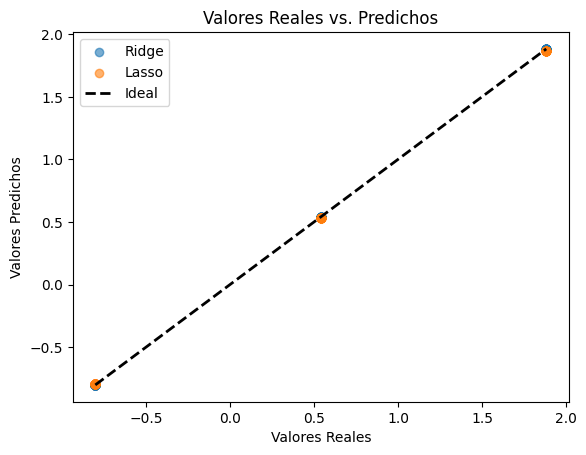

In [103]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Ridge')
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.legend()
plt.show()


# Curva de Regularización
Propósito: Analizar cómo cambian los coeficientes de las características con diferentes valores de
𝛼
α.

Cómo Interpretar:
En Ridge, los coeficientes disminuyen progresivamente a medida que aumenta
𝛼
α.

En Lasso, algunos coeficientes se reducen a 0 completamente.
Aplicable a: Ridge y Lasso.

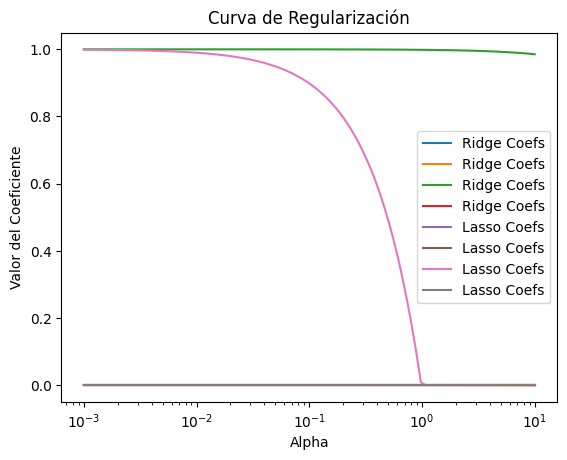

In [104]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.logspace(-3, 1, 100)  # Rango de valores para alpha
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.plot(alphas, ridge_coefs, label='Ridge Coefs')
plt.plot(alphas, lasso_coefs, label='Lasso Coefs')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Valor del Coeficiente')
plt.title('Curva de Regularización')
plt.legend()
plt.show()


# Residuales del Modelo
Propósito: Analizar los errores de las predicciones.

Cómo Interpretar:

Residuales distribuidos alrededor de 0 indican un buen ajuste.
Patrones en los residuales sugieren problemas en el modelo (e.g., relaciones no capturadas).

Aplicable a: Regresión lineal, Ridge, y Lasso.

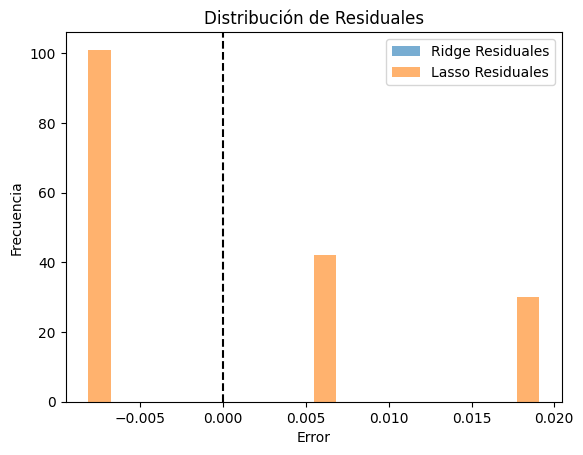

In [105]:
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

plt.hist(residuals_ridge, bins=20, alpha=0.6, label='Ridge Residuales')
plt.hist(residuals_lasso, bins=20, alpha=0.6, label='Lasso Residuales')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuales')
plt.legend()
plt.show()


# ÁRBOL DE DECISIÓN Y RANDOM FOREST

Árbol de Decisión - RMSE: 0.2121, R^2: 0.9814


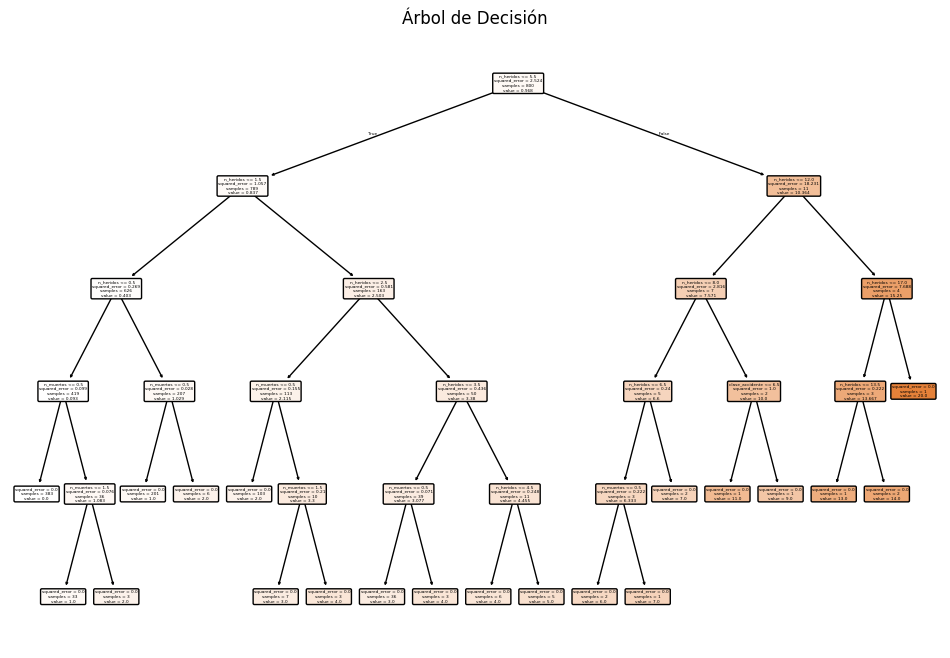

Random Forest - RMSE: 0.1958, R^2: 0.9842


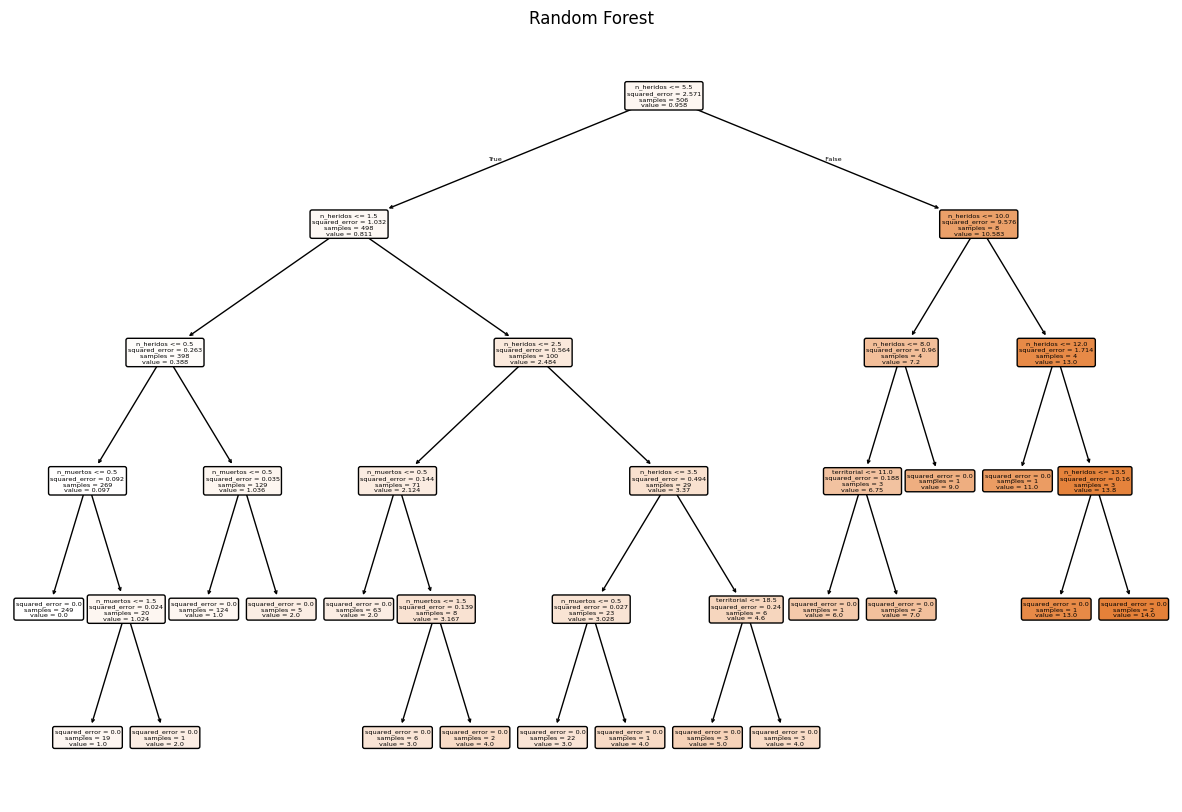

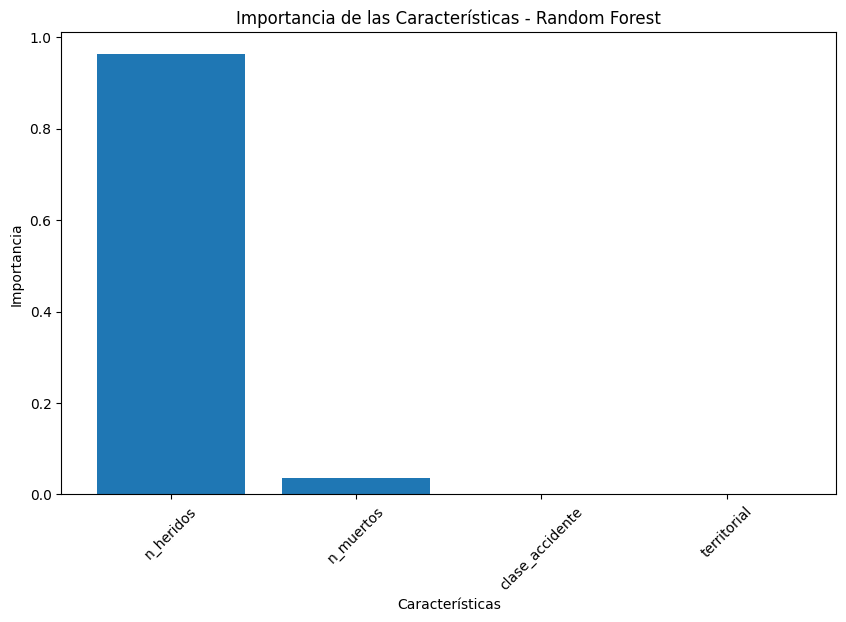

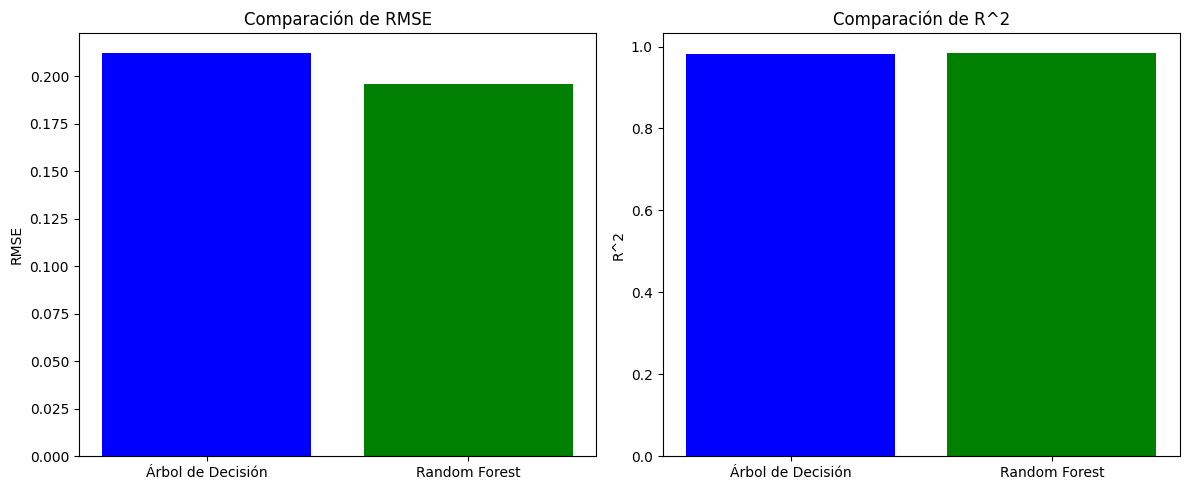

In [106]:


# ----------------------
# 1. Cargar los datos
# ----------------------
url = "https://www.datos.gov.co/resource/jj5k-4x95.csv"
df = pd.read_csv(url)

# Seleccionar variables relevantes
columns_of_interest = ['fecha_acc', 'territorial', 'clase_accidente', 'n_heridos', 'n_muertos']
df = df[columns_of_interest]
df['n_accidentes'] = df['n_heridos'] + df['n_muertos']

# Manejar valores nulos
df = df.dropna()

# Convertir variables categóricas en numéricas
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['territorial', 'clase_accidente']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Dividir variables predictoras (X) y objetivo (y)
X = df[['territorial', 'clase_accidente', 'n_heridos', 'n_muertos']]
y = df['n_accidentes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 2. Árboles de Decisión
# ----------------------------
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones del Árbol de Decisión
y_pred_tree = tree_model.predict(X_test)

# Evaluación
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_r2 = r2_score(y_test, y_pred_tree)
print(f"Árbol de Decisión - RMSE: {tree_rmse:.4f}, R^2: {tree_r2:.4f}")

# Visualización del Árbol
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()

# ----------------------------
# 3. Random Forest
# ----------------------------
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(X_train, y_train)

# Predicciones de Random Forest
y_pred_forest = forest_model.predict(X_test)

# Evaluación
forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))
forest_r2 = r2_score(y_test, y_pred_forest)
print(f"Random Forest - RMSE: {forest_rmse:.4f}, R^2: {forest_r2:.4f}")

# Importancia de las características
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

from sklearn.tree import plot_tree

# Seleccionar un árbol individual del modelo Random Forest
random_tree = forest_model.estimators_[0]  # Seleccionamos el primer árbol

# Graficar el árbol seleccionado
plt.figure(figsize=(15, 10))
plot_tree(random_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Random Forest")
plt.show()

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

# ----------------------------
# 4. Comparación de Resultados
# ----------------------------
models = ['Árbol de Decisión', 'Random Forest']
rmse_values = [tree_rmse, forest_rmse]
r2_values = [tree_r2, forest_r2]

# Graficar Comparativa de Desempeño
plt.figure(figsize=(12, 5))

# RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title("Comparación de RMSE")
plt.ylabel("RMSE")

# R^2
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title("Comparación de R^2")
plt.ylabel("R^2")

plt.tight_layout()
plt.show()


# GRÁFICA DEL RANDOM FOREST

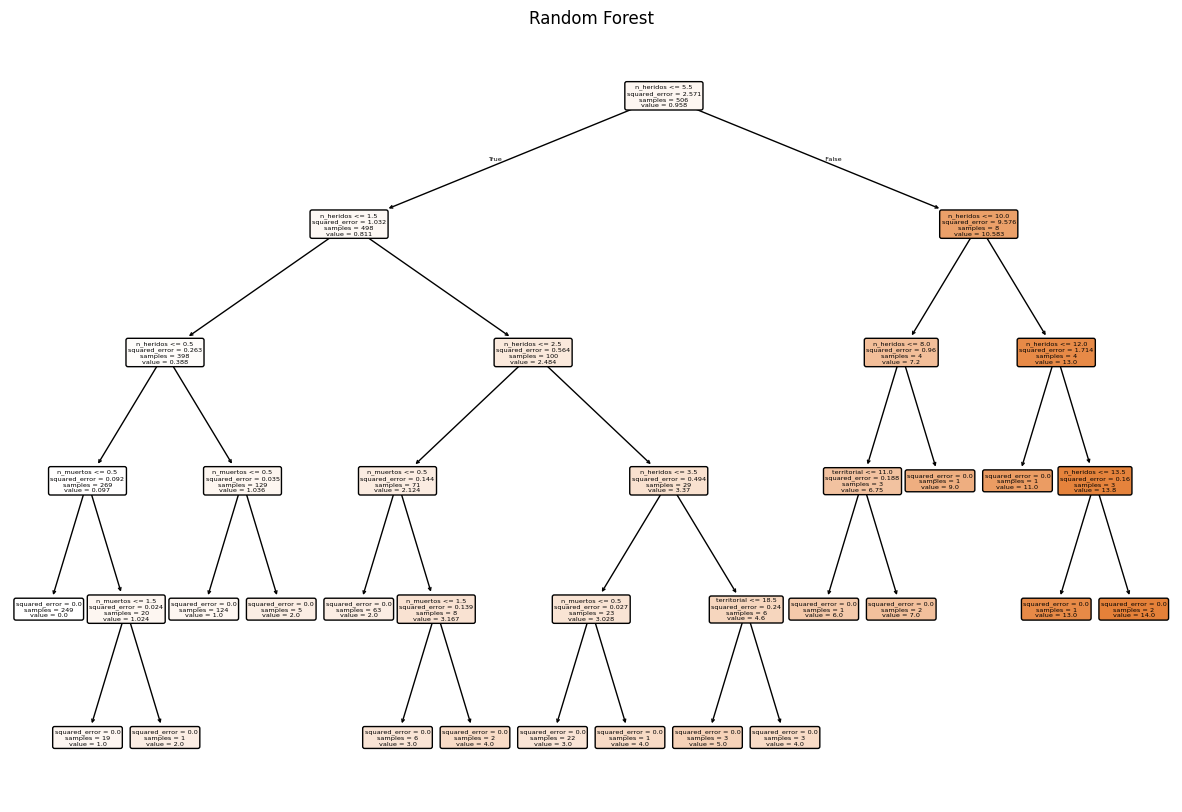

In [107]:
from sklearn.tree import plot_tree

# Seleccionar un árbol individual del modelo Random Forest
random_tree = forest_model.estimators_[0]  # Seleccionamos el primer árbol

# Graficar el árbol seleccionado
plt.figure(figsize=(15, 10))
plot_tree(random_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Random Forest")
plt.show()

In [108]:
# Codigo de ajuste para el Modelo de Clasificación 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Codigo de ajuste para el Modelo de Clasificación 1
#Modelo 1: DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)

# Ajuste
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
# Codigo de ajuste para el Modelo de Clasificación 2
# Modelo 2: Randon Forrest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajuste
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Mostrar la evaluación del primer Modelo

# Evaluar el Árbol de decisión
print("Evaluación del Árbol de Decisión ")

# Caluclar la predicicón
y_pred_dt = dt_model.predict(X_test)

# Reporte de Clasificación revisar recall y f1-score
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

# Matriz de Confusión V:P/N y F P/N
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt))

# Calcular la precisión (Exactitud)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Precisión del Árbol de Decisión: {accuracy_dt}")

Evaluación del Árbol de Decisión 
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        50
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00         6
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.99      0.98      0.98       200

Matriz de Confusión:
[[101   0   0   0   0   0   0   0   0   0   0   0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [112]:
# Mostrar la comparación de los Modelos de desempeño
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming rf_model is your trained Random Forest model and X_test is your test data
y_pred_rf = rf_model.predict(X_test) # This line is added to define y_pred_rf

metrics = {
    "Modelo": ["Árbol de Decisión", "Random Forest"],
    "Exactitud": [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Precisión": [precision_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted')],
    "Recall": [recall_score(y_test, y_pred_dt, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted')],
    "F1-Score": [f1_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')]
}

# Crear el DataFrame
df_metrics = pd.DataFrame(metrics)

# Mostrar el DataFrame
print(df_metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              Modelo  Exactitud  Precisión  Recall  F1-Score
0  Árbol de Decisión      0.985   0.985139   0.985  0.984535
1      Random Forest      0.970   0.961099   0.970  0.964587


### **Explicación de las Métricas**

1. **Exactitud (Accuracy):**
   - Proporción de predicciones correctas respecto al total de ejemplos.
   - Fórmula:  
     \[
     \text{Exactitud} = \frac{\text{Predicciones Correctas}}{\text{Total de Predicciones}}
     \]
   - **Interpretación:**  
     Un valor alto indica que el modelo clasifica correctamente la mayoría de los ejemplos. Aquí, el Árbol de Decisión supera ligeramente al Random Forest con una exactitud del 98.5%.

2. **Precisión (Precision):**
   - Proporción de verdaderos positivos (\(TP\)) respecto a todas las predicciones positivas (\(TP + FP\)).
   - Fórmula:  
     \[
     \text{Precisión} = \frac{\text{TP}}{\text{TP} + \text{FP}}
     \]
   - **Interpretación:**  
     Mide la confiabilidad de las predicciones positivas. El Árbol de Decisión tiene una mayor precisión (98.51%), lo que indica menos falsos positivos en comparación con el Random Forest (96.11%).

3. **Recall (Sensibilidad):**
   - Proporción de verdaderos positivos (\(TP\)) respecto a todos los positivos reales (\(TP + FN\)).
   - Fórmula:  
     \[
     \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
     \]
   - **Interpretación:**  
     Mide la capacidad del modelo para identificar correctamente los positivos reales. Ambos modelos tienen un recall alto (Árbol de Decisión: 98.5%, Random Forest: 97.0%), pero el Árbol de Decisión tiene una ligera ventaja.

4. **F1-Score:**
   - Promedio armónico entre Precisión y Recall.
   - Fórmula:  
     \[
     \text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
     \]
   - **Interpretación:**  
     Una métrica equilibrada que considera tanto la precisión como el recall. El Árbol de Decisión tiene un F1-Score más alto (98.45%) que el Random Forest (96.45%).

---





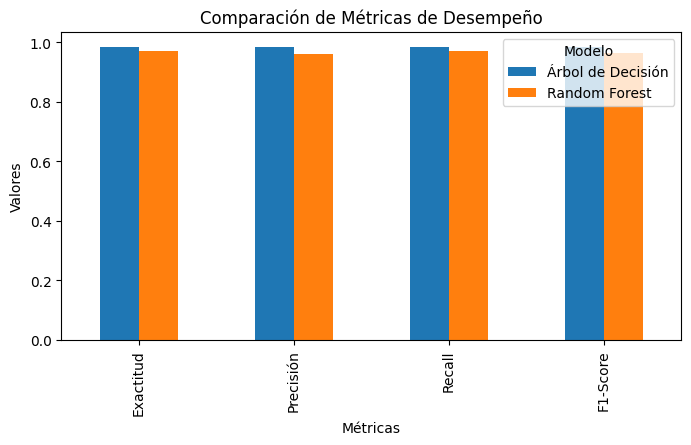

In [113]:
# Mostrar la comparación de los Modelos de desempeño de forma gráfica

# Transponer el el DataFrame para la gráfica
df_metrics_transpuesto = df_metrics.set_index("Modelo").T

# Grafico de Barras
df_metrics_transpuesto.plot(kind="bar", figsize=(8, 4))
plt.title("Comparación de Métricas de Desempeño")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.show()

# Crear un Estructura de control repetitiva For para acomodar las etiquetas de datos en las barras


In [114]:
!pip install dtreeviz

# GRÁFICA DEL ÁRBOL DE DECISIÓN

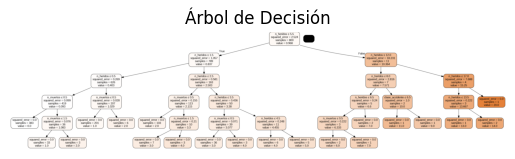

In [115]:
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import tree

# Exportar el árbol del modelo de DecisionTree
# Cambia `dt_model` por el modelo de Árbol de Decisión utilizado
dt_model = tree_model  # Asegúrate de que `tree_model` esté definido

# Exportar el árbol en formato DOT
dot_data = tree.export_graphviz(dt_model, out_file=None,
                                feature_names=X.columns,  # Nombres de las columnas predictoras
                                filled=True, rounded=True,
                                special_characters=True)

# Convertir el archivo DOT a PNG con pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('arbol_decision.png')

# Leer y mostrar la imagen del árbol
img = pltimg.imread('arbol_decision.png')
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.title("Árbol de Decisión")
plt.show()




# GRÁFICA DEL RANDON FOREST

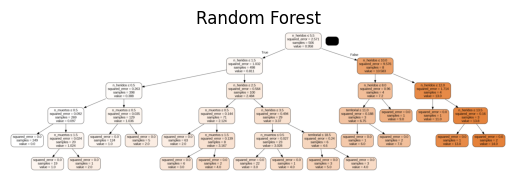

In [116]:
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import tree

# Seleccionar un árbol individual del modelo Random Forest
rf_tree = forest_model.estimators_[0]  # Cambia el índice para elegir otro árbol

# Exportar el árbol en formato DOT
dot_data = tree.export_graphviz(rf_tree, out_file=None,
                                feature_names=X.columns,  # Nombres de las características
                                filled=True, rounded=True,
                                special_characters=True)

# Convertir el archivo DOT a PNG con pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('random_forest_tree.png')

# Leer y mostrar la imagen del árbol
img = pltimg.imread('random_forest_tree.png')
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.title("Random Forest")
plt.show()
